# Stock study

In [17]:
import baostock as bs
import pandas as pd
import math

In [15]:
def getName(indexlist):
    data_list = []
    for index in indexlist:
#         print ('index',index)
        rs = bs.query_stock_basic(code=index)
#         print ('rs',rs.get_row_data()[1])
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data()[1])
    return data_list

# 上证50成分股

In [12]:
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
stockname = getName(result.code)
# 结果集输出到csv文件
print (stockname)
# result.to_csv("sz50_stocks.csv", encoding="gbk", index=False)


# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_sz50 error_code:0
query_sz50  error_msg:success
index sh.600000
rs ['sh.600000', '浦发银行', '1999-11-10', '', '1', '1']
index sh.600009
rs ['sh.600009', '上海机场', '1998-02-18', '', '1', '1']
index sh.600016
rs ['sh.600016', '民生银行', '2000-12-19', '', '1', '1']
index sh.600028
rs ['sh.600028', '中国石化', '2001-08-08', '', '1', '1']
index sh.600030
rs ['sh.600030', '中信证券', '2003-01-06', '', '1', '1']
index sh.600031
rs ['sh.600031', '三一重工', '2003-07-03', '', '1', '1']
index sh.600036
rs ['sh.600036', '招商银行', '2002-04-09', '', '1', '1']
index sh.600048
rs ['sh.600048', '保利地产', '2006-07-31', '', '1', '1']
index sh.600050
rs ['sh.600050', '中国联通', '2002-10-09', '', '1', '1']
index sh.600104
rs ['sh.600104', '上汽集团', '1997-11-25', '', '1', '1']
index sh.600196
rs ['sh.600196', '复星医药', '1998-08-07', '', '1', '1']
index sh.600276
rs ['sh.600276', '恒瑞医药', '2000-10-18', '', '1', '1']
index sh.600309
rs ['sh.600309', '万华化学', '2

## 沪深指数

In [11]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；


# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000037",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2017-01-01', end_date='2021-01-10', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("D:\\history_Index_k_data.csv", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code        open        high         low       close  \
0    2017-01-03  sh.000037   5953.5280   5991.2190   5940.8550   5991.2190   
1    2017-01-04  sh.000037   5985.1330   6018.3590   5972.5910   6013.2050   
2    2017-01-05  sh.000037   6011.9300   6016.5060   5996.3960   6000.7450   
3    2017-01-06  sh.000037   5998.1750   6000.6980   5942.9390   5949.9300   
4    2017-01-09  sh.000037   5951.5770   5965.7330   5936.6400   5957.5670   
..          ...        ...         ...         ...         ...         ...   
974  2021-01-04  sh.000037  10119.8793  10182.3144  10058.3383  10101.7504   
975  2021-01-05  sh.000037  10079.9564  10398.5806  10073.3666  10358.0261   
976  2021-01-06  sh.000037  10368.5413  10485.8545  10275.5323  10479.7424   
977  2021-01-07  sh.000037  10509.4613  10509

## 估值

In [12]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股估值指标(日频)数据 ####
# peTTM    滚动市盈率
# psTTM    滚动市销率
# pcfNcfTTM    滚动市现率
# pbMRQ    市净率
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,close,peTTM,pbMRQ,psTTM,pcfNcfTTM",
    start_date='2018-01-01', end_date='2020-12-31', 
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
result_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    result_list.append(rs.get_row_data())
result = pd.DataFrame(result_list, columns=rs.fields)

#### 结果集输出到csv文件 ####
result.to_csv("history_A_stock_valuation_indicator_data.csv", encoding="gbk", index=False)
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code    close     peTTM     pbMRQ     psTTM  pcfNcfTTM
0    2018-01-02  sh.600000  12.7200  6.874707  0.963660  2.267837  -2.005514
1    2018-01-03  sh.600000  12.6600  6.842279  0.959114  2.257139  -1.996054
2    2018-01-04  sh.600000  12.6600  6.842279  0.959114  2.257139  -1.996054
3    2018-01-05  sh.600000  12.6900  6.858493  0.961387  2.262488  -2.000784
4    2018-01-08  sh.600000  12.6800  6.861806  0.960630  2.207251  -1.999207
..          ...        ...      ...       ...       ...       ...        ...
725  2020-12-25  sh.600000   9.5800  5.084597  0.551086  1.456712   3.428645
726  2020-12-28  sh.600000   9.5700  5.079289  0.550511  1.455191   3.425066
727  2020-12-29  sh.600000   9.5300  5.058059  0.548210  1.449109   3.410750
728  2020-12-30  sh.600000   9.5000  5.042136  0.546484

## 证券资料

In [9]:
import baostock as bs
import pandas as pd

# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取证券基本资料
rs = bs.query_stock_basic(code="sh.600000")
# rs = bs.query_stock_basic(code_name="浦发银行")  # 支持模糊查询
print('query_stock_basic respond error_code:'+rs.error_code)
print('query_stock_basic respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
# result.to_csv("stock_basic.csv", encoding="gbk", index=False)
print(result)

# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_stock_basic respond error_code:0
query_stock_basic respond  error_msg:success
        code code_name     ipoDate outDate type status
0  sh.600000      浦发银行  1999-11-10            1      1
logout success!


# 获得五年平均收益

login success!
login respond error_code:0
login respond error_msg:success
                     open          close
sh.600000  110.2423821700  98.2746274900
                    open          close
sh.600004  17.8479461900  29.2875064300
                    open           close
sh.600009  67.5470969600  189.1101817000
                    open         close
sh.600010  16.2988456400  8.3327324000
                    open          close
sh.600011  25.0178720000  16.7920354200
                    open          close
sh.600015  28.7200359600  21.6277234500
                     open           close
sh.600016  128.5453953000  108.7672272000
                    open          close
sh.600018  72.2803165000  64.8503221500
                   open          close
sh.600019  8.8242284000  12.5336551200
          open         close
sh.600025  NaN  4.9326735900
                   open         close
sh.600027  7.4086786200  4.6728871800
                   open          close
sh.600028  9.1548454800  10.3

          open          close
sh.601138  NaN  13.8418731500
                    open          close
sh.601155  17.3000000000  51.4319594700
          open         close
sh.601162  NaN  6.5236780800
                    open          close
sh.601166  57.8076899400  88.9789435500
                    open          close
sh.601169  20.2511150400  17.2782279000
                    open         close
sh.601186  13.5990131400  9.8531012000
                    open          close
sh.601198  25.1399818200  13.3060120000
                    open          close
sh.601211  21.4054563000  19.2158444500
                    open          close
sh.601216  56.8905291000  72.4081632300
                   open          close
sh.601225  4.4514973000  11.0122022400
          open          close
sh.601229  NaN  20.8957012200
                    open          close
sh.601231  25.4223312000  42.1212312000
          open          close
sh.601236  NaN  18.1870248000
                    open          close
sh.601

                    open           close
sz.000786  79.2372050300  304.4053693600
                     open            close
sz.000858  348.6783810000  4216.3937600000
                    open           close
sz.000860  29.4777252000  142.5614034000
                     open           close
sz.000876  117.2405569500  313.2567688400
                     open           close
sz.000895  245.2123668000  788.9207471100
                     open          close
sz.000938  139.3489619200  94.8198772800
                    open          close
sz.000961  20.8935005700  36.9093259000
                     open           close
sz.000963  172.1001441300  229.7831210600
                     open           close
sz.000977  108.8137778000  128.8046931600
                    open          close
sz.001979  19.3500000000  15.1695778700
                     open           close
sz.002001  165.4284223800  684.7510800000
                     open            close
sz.002007  380.9094471000  1243.2593451000
  

NameError: name 'plt' is not defined

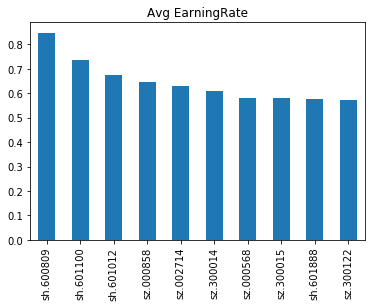

In [20]:
def get_closeprice(code):
    #### 获取沪深 A 股历史 K 线数据 ####
    # 详细指标参数，参见“历史行情指标参数”章节
    rs_open = bs.query_history_k_data(code,"open",start_date='2016-01-05', end_date='2016-01-05', frequency="d", adjustflag="1")

    data_list = []
    while (rs_open.error_code == '0') & rs_open.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs_open.get_row_data())
    result_open = pd.DataFrame(data_list,columns=rs_open.fields,index=[code])

    rs_close = bs.query_history_k_data(code,"close",start_date='2020-12-29', end_date='2020-12-29',frequency="d", adjustflag="1")

    data_list = []
    while (rs_close.error_code == '0') & rs_close.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs_close.get_row_data())
    result_close = pd.DataFrame(data_list,columns=rs_close.fields,index=[code])

    result = result_open.join(result_close)
    print (result)
    return result
def compute_Avg_EarningRate():
    # 登陆系统
    lg = bs.login()
    # 显示登陆返回信息
    print('login respond error_code:'+lg.error_code)
    print('login respond error_msg:'+lg.error_msg)

    # 获取全部证券基本资料
#     rs = bs.query_stock_basic()
    rs = bs.query_hs300_stocks()
    
    result = pd.DataFrame()
    codelist = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        code = rs.get_row_data()[1]
        codelist.append(code)
        df = get_closeprice(code)
        if result.empty:
            result = df
        else:
            result = result.append(df)


    result = result[result['open'] != '']
    result['open'] = result['open'].astype(float)
    result['close'] = result['close'].astype(float)
#     print ('codelist',codelist)
    result['name']= getName(codelist)
#     print ('!!!:',result['name'])
    result['avgEarningRate'] =(result['close']/result['open']).apply(lambda x: math.pow(x,1./5)-1)
    result = result.sort_values(by=['avgEarningRate'],ascending=False)
    result.to_csv("Avg_Earning_Rate_data.csv", encoding="gbk",
    index=False)

    result[:10]['avgEarningRate'].plot(title='Avg EarningRate',kind='bar')
    plt.show()
 # 登出系统
    bs.logout()
if __name__ == '__main__':
     compute_Avg_EarningRate()

In [30]:
import baostock as bs
import pandas as pd

def getName(indexlist):
    data_list = []
    for index in indexlist:
        rs = bs.query_stock_basic(code=index)
        # 打印结果集
    
        # 获取一条记录，将记录合并在一起
        stock = rs.get_row_data()
        data_list.append(stock[1])
    return pd.DataFrame(data_list, columns=["code_name"])
    
    
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取上证50成分股
rs = bs.query_sz50_stocks()
print('query_sz50 error_code:'+rs.error_code)
print('query_sz50  error_msg:'+rs.error_msg)

# 打印结果集
sz50_stocks = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    sz50_stocks.append(rs.get_row_data())
result = pd.DataFrame(sz50_stocks, columns=rs.fields)
stockname = getName(result.code)
# 结果集输出到csv文件
print (stockname)
# result.to_csv("sz50_stocks.csv", encoding="gbk", index=False)


# 登出系统
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_sz50 error_code:0
query_sz50  error_msg:success
   code_name
0       浦发银行
1       上海机场
2       民生银行
3       中国石化
4       中信证券
5       三一重工
6       招商银行
7       保利地产
8       中国联通
9       上汽集团
10      复星医药
11      恒瑞医药
12      万华化学
13      贵州茅台
14      山东黄金
15      恒生电子
16      海螺水泥
17      用友网络
18      海尔智家
19      三安光电
20      闻泰科技
21      海通证券
22      伊利股份
23      中泰证券
24      隆基股份
25      中信建投
26      中国神华
27      工业富联
28      兴业银行
29      中国铁建
30      国泰君安
31      红塔证券
32      农业银行
33      中国平安
34      中国人保
35      新华保险
36      工商银行
37      中国太保
38      中国人寿
39      中国建筑
40      华泰证券
41      京沪高铁
42      光大银行
43      中国石油
44      中国中免
45      汇顶科技
46      药明康德
47      海天味业
48      韦尔股份
49      兆易创新
logout success!
